<a href="https://colab.research.google.com/github/hakureikaze/tfDevProCert/blob/main/Clip%20art%20classification%20with%20CNN%20fed%20with%20ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [1]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  # Your Code
  def __init__(self, threshold):
    super().__init__()
    self.threshold = threshold

  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy') > self.threshold:
      print(f'Stopping early as accuracy reached {self.threshold}')
      self.model.stop_training = True

callbacks = myCallback(DESIRED_ACCURACY)

--2021-03-27 22:32:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.208, 172.217.9.208, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2021-03-27 22:32:28 (260 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [7]:
train_happy_names = os.listdir('/tmp/h-or-s/happy/')
print(train_happy_names[:10])
print(len(train_happy_names))

['happy2-06.png', 'happy1-05.png', 'happy2-10.png', 'happy1-00.png', 'happy1-04.png', 'happy1-12.png', 'happy2-05.png', 'happy2-19.png', 'happy2-03.png', 'happy1-10.png']
40


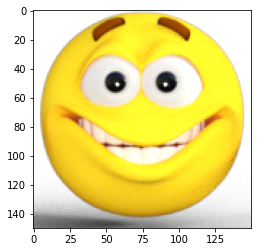

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(150, 150, 4)

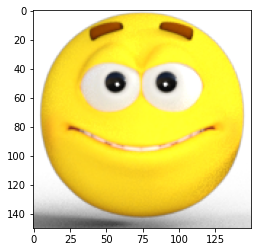

In [10]:
img = mpimg.imread(os.path.join('/tmp/h-or-s/happy/',train_happy_names[1]))
plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x.shape

In [2]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
# Your Code Here
tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
tf.keras.layers.MaxPool2D((2,2)),
tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D((2,2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D((2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid')

])

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [4]:
# This code block should call model.fit and train for
# a number of epochs. 
history = model.fit(
      train_generator,
      epochs=20,
      verbose=1,
      callbacks=[callbacks])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/20
5/5 [==============================] - 4s 30ms/step - loss: 6.9735 - accuracy: 0.3920
Epoch 2/20
5/5 [==============================] - 0s 31ms/step - loss: 0.5335 - accuracy: 0.7184
Epoch 3/20
5/5 [==============================] - 0s 31ms/step - loss: 0.4744 - accuracy: 0.6816
Epoch 4/20
5/5 [==============================] - 0s 34ms/step - loss: 0.4104 - accuracy: 0.7441
Epoch 5/20
5/5 [==============================] - 0s 31ms/step - loss: 0.1708 - accuracy: 0.9451
Epoch 6/20
5/5 [==============================] - 0s 30ms/step - loss: 0.2881 - accuracy: 0.8411
Epoch 7/20
5/5 [==============================] - 0s 31ms/step - loss: 0.1671 - accuracy: 0.8658
Epoch 8/20
5/5 [==============================] - 0s 31ms/step - loss: 0.0986 - accuracy: 0.9481
Epoch 9/20
5/5 [==============================] - 0s 29ms/step - loss: 0.1378 - accuracy: 0.9483
Epoch 10/20
5/5 [==============================] - 0s 31ms/step - loss: 0.1546 - accuracy: 0.9184
Epoch 11/20
5/5 [============